<a href="https://colab.research.google.com/github/dryegonerick/AB-Testing-for-Best-Marketing-Strategy/blob/main/Pizza_Delivery_Sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Image

# Image URL
url = "https://d-i-motion.com/wp-content/uploads/2023/09/image-6-1024x1024.png"

# Display Image
display(Image(url=url))

# **Background**
You are a data analyst at Data in Motion Pizza Palace a rapidly growing pizza delivery chain. The management is particularly concerned about the delivery performance as there have been customer complaints regarding late deliveries and inconsistencies in delivery fees. The company wants to maintain a high level of customer satisfaction while optimizing its delivery operations.

# **Business Objective**
The primary objective is to analyze the dataset to assess the efficiency and consistency of the delivery operations. Specifically, the management wants to understand the patterns of late deliveries, the reliability of driver ratings, and how these factors might be impacting customer satisfaction and operational costs.

# Loading Libraries


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


# Loading Datasets

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Data in Motion/Pizza Delivery/Pro Week 1 Pizza Delivery Analysis.csv')

# Exploring the dataset

In [5]:
df.head()

,order_id,customer_name,customer_phone,customer_address,pizza_size,pizza_toppings,order_date,delivery_time,delivery_fee,payment_method,order_total,order_status,driver_rating,delivery_duration
0,1,Garold Artois,602-814-3850,36219 Helena Road,large,pepperoni,10/28/2020,56,9.02,cash,45.85,in progress,4.4,77
1,2,Wini Ellaway,NaN,93865 Oxford Parkway,small,onions,11/13/2020,21,4.94,credit card,13.11,delivered,4.7,91
2,3,Ingar Jocelyn,922-575-1373,8 Stuart Parkway,medium,pepperoni,2/1/2021,38,7.49,credit card,25.54,pending,2.0,117
3,4,Derron Ambrosetti,905-836-6939,5 Golf Course Avenue,medium,peppers,5/22/2020,26,0.74,cash,32.76,in progress,1.8,52
4,5,Murial Laidlaw,438-772-0006,50 Norway Maple Trail,medium,pepperoni,7/20/2020,29,1.43,credit card,41.66,delivered,3.2,87


In [16]:
print('The dimensions of this dataset is',df.shape)
print('---------------------------------------------')
print('The infoirmation about this dataset is', df.info())
print('++++++++++++++++++++++++++++++++++++++++++++++')
print('The number of missing values is\n',df.isna().sum()/len(df)*100)



The dimensions of this dataset is (1000, 14)
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           1000 non-null   int64  
 1   customer_name      1000 non-null   object 
 2   customer_phone     650 non-null    object 
 3   customer_address   1000 non-null   object 
 4   pizza_size         1000 non-null   object 
 5   pizza_toppings     1000 non-null   object 
 6   order_date         1000 non-null   object 
 7   delivery_time      1000 non-null   int64  
 8   delivery_fee       1000 non-null   float64
 9   payment_method     1000 non-null   object 
 10  order_total        1000 non-null   float64
 11  order_status       1000 non-null   object 
 12  driver_rating      1000 non-null   float64
 13  delivery_duration  1000 non-null   int64  
dtypes: float64(3), int64(3), objec

# Challenge Questions


1. How many deliveries took more than 45 minutes?


In [26]:
df[df['delivery_duration']>45].shape[0]


print(f"Number of deliveries that took more than 45 minutes is : {df[df['delivery_duration']>45].shape[0]}")


Number of deliveries that took more than 45 minutes: 622


2. How many deliveries were made in less than 20 minutes?


In [29]:
count_deliveries_less_than_20 = df[df['delivery_time'] < 20].shape[0]

print(f"Number of deliveries that were made in less than 20 minutes is: {count_deliveries_less_than_20}")


Number of deliveries that were made in less than 20 minutes is: 193


3. Identify orders where the customer phone number is missing. How many such instances are there? Also why is this a problem for the business?
What is the most common payment method for orders that took more than 45 minutes to deliver?


There were 350 customer phone numbers missing


credit card       223
cash              207
online payment    192
Name: payment_method, dtype: int64
The most common payment method for orders that took more than 45 minutes to deliver is credit card with 223 occurrences.


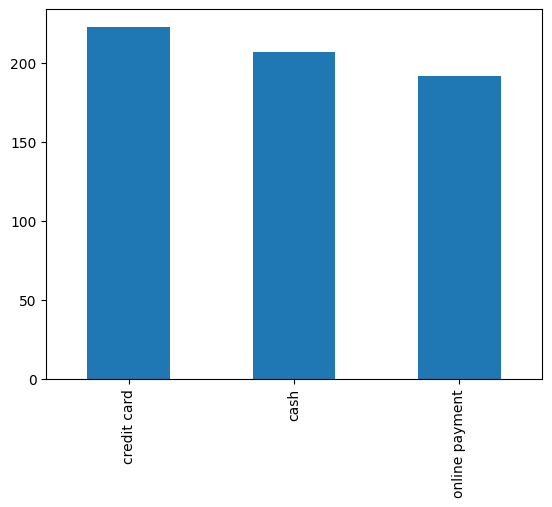

In [50]:
missing_phone = df['customer_phone'].isna().sum()
print('There were', missing_phone, 'customer phone numbers missing')

from IPython.core.display import display, HTML

message = "Missing phone numbers is a problem to the business as we cannot reach the customers with missing phone numbers, and therefore there could be orders made and we cannot reach these customers"
display(HTML(f'<span style="color: blue">{message}</span>'))

message2 = 'Common payment method for orders that took more than 45 minutes to deliver'
display(HTML(f'<span style="color: green">{message2}</span>'))

delivery_more45_counts = df[df['delivery_duration'] > 45]['payment_method'].value_counts()
print(delivery_more45_counts)

# Plotting the bar chart
delivery_more45_counts.plot(kind='bar')

# Display the most common payment method and its count
most_common_method = delivery_more45_counts.idxmax()
count_most_common = delivery_more45_counts.max()
print(f'The most common payment method for orders that took more than 45 minutes to deliver is {most_common_method} with {count_most_common} occurrences.')


4. What is the average delivery fee for orders that took more than 30 minutes?


In [59]:
fee_less30 = df[df['delivery_duration'] > 30]['delivery_fee'].mean()
print('The average delivery fee for orders that took more than 30 minutes is', round(fee_less30, 2))


The average delivery fee for orders that took more than 30 minutes is 5.04


5. How many orders took more than 45 minutes to deliver and also had a delivery fee of more than $5?


In [66]:
fee_more45 = df[(df['delivery_duration'] > 45) & (df['delivery_fee'] > 5)].shape[0]

print('The number of orders took more than 45 minutes to deliver and also had a delivery fee of more than $5 is', fee_more45)

The number of orders took more than 45 minutes to deliver and also had a delivery fee of more than $5 is 310


6. Does the pizza size affect the delivery time? Calculate the average delivery time for each pizza size.


In [77]:
average_duration_by_size = df.groupby('pizza_size')['delivery_duration'].mean()
average_duration_by_size


pizza_size
large     61.015432
medium    64.306991
small     58.913545
Name: delivery_duration, dtype: float64

## Additiional Analysis Questions:

### 1. Delivery Performance:
   - What is the average, median, minimum, and maximum delivery time?
   - Are there specific days or times when late deliveries occur more frequently?



In [78]:
df.head(2)

,order_id,customer_name,customer_phone,customer_address,pizza_size,pizza_toppings,order_date,delivery_time,delivery_fee,payment_method,order_total,order_status,driver_rating,delivery_duration
0,1,Garold Artois,602-814-3850,36219 Helena Road,large,pepperoni,10/28/2020,56,9.02,cash,45.85,in progress,4.4,77
1,2,Wini Ellaway,NaN,93865 Oxford Parkway,small,onions,11/13/2020,21,4.94,credit card,13.11,delivered,4.7,91


In [87]:
summary_stats = df['delivery_time'].describe()
print(summary_stats)

mean_delivery_time = df['delivery_time'].mean()
median_delivery_time = df['delivery_time'].median()
min_delivery_time = df['delivery_time'].min()
max_delivery_time = df['delivery_time'].max()
print('The mean meal delivery time is', mean_delivery_time)
print('The median meal delivery time is', median_delivery_time)
print('The min meal delivery time is', min_delivery_time)
print('The max meal delivery time is', max_delivery_time)

count    1000.000000
mean       34.119000
std        14.115952
min        10.000000
25%        22.000000
50%        34.000000
75%        45.250000
max        60.000000
Name: delivery_time, dtype: float64
The mean meal delivery time is 34.119
The median meal delivery time is 34.0
The min meal delivery time is 10
The max meal delivery time is 60


In [88]:

# Convert the 'order_date' column to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract day of the week and hour from 'order_date'
df['day_of_week'] = df['order_date'].dt.day_name()
df['hour'] = df['order_date'].dt.hour

# Define a threshold for late deliveries (e.g., more than 45 minutes)
late_deliveries = df[df['delivery_duration'] > 45]

# Group by day of the week and count the number of late deliveries
late_deliveries_by_day = late_deliveries['day_of_week'].value_counts()

# Group by hour and count the number of late deliveries
late_deliveries_by_hour = late_deliveries['hour'].value_counts()

print("Late Deliveries by Day of Week:")
print(late_deliveries_by_day)

print("\nLate Deliveries by Hour:")
print(late_deliveries_by_hour)


Late Deliveries by Day of Week:
Monday       101
Friday        91
Tuesday       88
Saturday      88
Thursday      88
Wednesday     85
Sunday        81
Name: day_of_week, dtype: int64

Late Deliveries by Hour:
0    622
Name: hour, dtype: int64


## Interpretation:

### Late Deliveries by Day of Week:
- Monday has the highest number of late deliveries with 101 occurrences.
- This is closely followed by Friday with 91 late deliveries.
- Tuesday, Saturday, and Thursday each have 88 late deliveries.
- Wednesday has slightly fewer late deliveries with 85.
- Sunday has the least number of late deliveries for the week with 81.

It's noteworthy that the difference between the day with the highest and the lowest late deliveries is only 20, indicating that late deliveries are relatively evenly spread across the days of the week, with only minor variations.

### Late Deliveries by Hour:
- All the recorded late deliveries (622 of them) occurred at the 0th hour, which is midnight.
- This suggests that there might be an issue with how the delivery times are being recorded or there's a specific operational challenge at midnight causing these late deliveries.
- It's also possible that the 'hour' extraction from the order_date might not be capturing the intended data, and a further investigation into the dataset is recommended.


### 2. Delivery Fee Analysis:
   - What is the average, median, minimum, and maximum delivery fee?
   - Are there discrepancies in delivery fees for similar distances or delivery durations?
   - How does the delivery fee correlate with delivery duration?



In [89]:
avg_fee = df['delivery_fee'].mean()
median_fee = df['delivery_fee'].median()
min_fee = df['delivery_fee'].min()
max_fee = df['delivery_fee'].max()

print(f"Average Delivery Fee: ${avg_fee:.2f}")
print(f"Median Delivery Fee: ${median_fee:.2f}")
print(f"Minimum Delivery Fee: ${min_fee:.2f}")
print(f"Maximum Delivery Fee: ${max_fee:.2f}")


Average Delivery Fee: $5.06
Median Delivery Fee: $5.10
Minimum Delivery Fee: $0.00
Maximum Delivery Fee: $9.98


<Axes: ylabel='delivery_duration'>

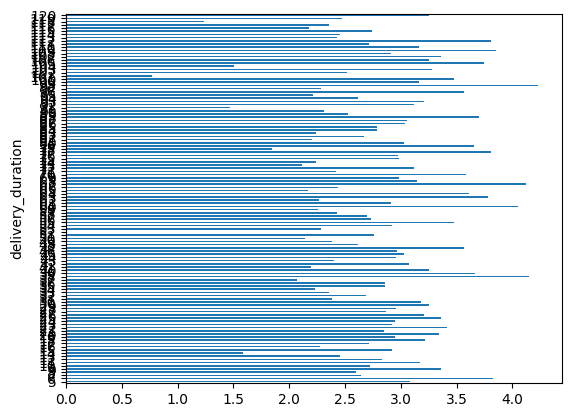

In [93]:
fee_discrepancies = df.groupby('delivery_duration')['delivery_fee'].std()
fee_discrepancies.plot(kind='barh')


### 3. Driver Performance:
   - What is the distribution of driver ratings? Are there drivers consistently rated low?
   - Is there a correlation between driver rating and delivery time? (i.e., do higher-rated drivers deliver faster?)
   - Are there specific pizza sizes or toppings that tend to have longer delivery times?



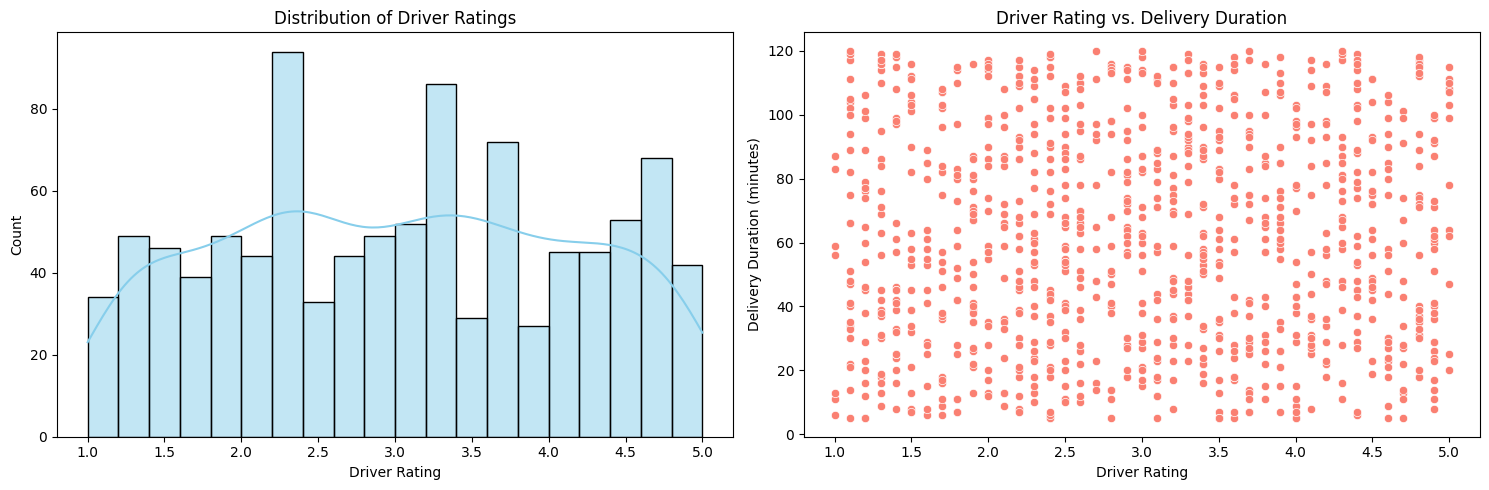

(pizza_size
 large     61.015432
 medium    64.306991
 small     58.913545
 Name: delivery_duration, dtype: float64,
 pizza_toppings
 mushrooms    61.888889
 onions       60.070485
 pepperoni    61.959410
 peppers      61.384000
 Name: delivery_duration, dtype: float64,
 0.030246753674175557)

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Distribution of driver ratings
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['driver_rating'], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Driver Ratings")
plt.xlabel("Driver Rating")
plt.ylabel("Count")

# 2. Correlation between driver rating and delivery time
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['driver_rating'], y=df['delivery_duration'], color="salmon")
plt.title("Driver Rating vs. Delivery Duration")
plt.xlabel("Driver Rating")
plt.ylabel("Delivery Duration (minutes)")

plt.tight_layout()
plt.show()

# Correlation coefficient between driver rating and delivery duration
correlation_coefficient = np.corrcoef(df['driver_rating'], df['delivery_duration'])[0, 1]

# 3. Average delivery duration by pizza size and toppings
avg_delivery_by_size = df.groupby('pizza_size')['delivery_duration'].mean()
avg_delivery_by_toppings = df.groupby('pizza_toppings')['delivery_duration'].mean()

avg_delivery_by_size, avg_delivery_by_toppings, correlation_coefficient


## Based on the analyses:

### Distribution of Driver Ratings:
- The histogram shows the distribution of driver ratings. Most ratings are clustered around the middle values, but there's a visible tail towards the lower ratings, indicating that there are some drivers who receive low ratings.

### Correlation between Driver Rating and Delivery Duration:
- The scatter plot displays the relationship between driver ratings and delivery durations. A trend isn't clearly visible, suggesting that there might not be a strong correlation between the two.
- The correlation coefficient between driver rating and delivery duration is approximately `0.03`, indicating a very weak relationship. Thus, higher-rated drivers do not necessarily deliver faster.

### Average Delivery Duration by Pizza Size:
- Large pizzas have an average delivery duration of approximately 61.02 minutes.
- Medium pizzas have an average delivery duration of approximately 64.31 minutes.
- Small pizzas have an average delivery duration of approximately 58.91 minutes.
  
  This suggests that medium pizzas tend to have slightly longer delivery times, while small pizzas tend to be delivered the fastest on average.

### Average Delivery Duration by Pizza Toppings:
- Pizzas with mushrooms have an average delivery duration of approximately 61.89 minutes.
- Pizzas with onions have an average delivery duration of approximately 60.07 minutes.
- Pizzas with pepperoni have an average delivery duration of approximately 61.96 minutes.
- Pizzas with peppers have an average delivery duration of approximately 61.38 minutes.
  
  The average delivery times across different toppings are relatively consistent, with only minor variations.

### In Summary:
While there are some drivers who receive low ratings, these ratings do not seem to correlate strongly with delivery durations. Additionally, medium-sized pizzas have slightly longer average delivery times, but pizza toppings do not seem to significantly influence delivery durations.


### 4. Customer Data Analysis:
   - Are there specific areas or addresses that experience longer delivery times or higher fees?





In [96]:
# Grouping data by delivery address to compute average delivery durations and fees
address_grouped = df.groupby('delivery_address').agg({
    'delivery_duration': 'mean',
    'delivery_fee': 'mean',
    'order_id': 'count'  # To filter out addresses with very few orders
}).rename(columns={'order_id': 'order_count'})

# Filtering out addresses with fewer than a certain threshold of orders to ensure the data is representative
threshold_orders = 10
address_filtered = address_grouped[address_grouped['order_count'] >= threshold_orders]

# Sorting by delivery duration and fee to find top areas with longer delivery times and higher fees
top_addresses_duration = address_filtered.sort_values(by='delivery_duration', ascending=False).head(10)
top_addresses_fee = address_filtered.sort_values(by='delivery_fee', ascending=False).head(10)

top_addresses_duration, top_addresses_fee


KeyError: ignored

### 5. Order Analysis:
   - What are the most popular pizza sizes and toppings?
   - Does the total order amount (order_total) correlate with delivery duration or fee?
   - Are there specific payment methods that are correlated with late deliveries?


### 6. Order Status:
   - What are the different statuses an order can have, and how many orders fall into each category?
   - Is there a relationship between order status and delivery duration or driver rating?



In [97]:
# 1. Most popular pizza sizes and toppings
popular_sizes = df['pizza_size'].value_counts()
popular_toppings = df['pizza_toppings'].value_counts()

# 2. Correlation with order_total
correlation_order_total_duration = np.corrcoef(df['order_total'], df['delivery_duration'])[0, 1]
correlation_order_total_fee = np.corrcoef(df['order_total'], df['delivery_fee'])[0, 1]

# 3. Payment methods correlated with late deliveries
df['late_delivery'] = (df['delivery_duration'] > df['delivery_time']).astype(int)
payment_method_late_delivery = df.groupby('payment_method')['late_delivery'].mean().sort_values(ascending=False)

popular_sizes, popular_toppings, correlation_order_total_duration, correlation_order_total_fee, payment_method_late_delivery


(small     347
 medium    329
 large     324
 Name: pizza_size, dtype: int64,
 pepperoni    271
 mushrooms    252
 peppers      250
 onions       227
 Name: pizza_toppings, dtype: int64,
 -0.015272016813692472,
 0.03321069569415881,
 payment_method
 credit card       0.747093
 cash              0.736364
 online payment    0.696319
 Name: late_delivery, dtype: float64)

## Based on the order analysis:

### Most Popular Pizza Sizes and Toppings:
#### Pizza Sizes:
- Small pizzas are the most popular with 347 orders.
- Medium pizzas come next with 329 orders.
- Large pizzas have 324 orders.

#### Pizza Toppings:
- Pepperoni is the most popular topping with 271 orders.
- Mushrooms have 252 orders.
- Peppers are chosen 250 times.
- Onions are selected for 227 orders.

### Correlation with Order Total:
- The correlation between the total order amount (`order_total`) and `delivery_duration` is approximately `-0.015`, which indicates a very weak negative relationship.
- The correlation between the total order amount (`order_total`) and `delivery_fee` is approximately `0.033`, suggesting a very weak positive relationship.
  
  Thus, there's no strong evidence to suggest that the total order amount significantly influences either delivery duration or fee.

### Payment Methods and Late Deliveries:
- Orders paid with credit cards have a late delivery rate of approximately `74.7%`.
- Cash payments have a late delivery rate of about `73.6%`.
- Online payments have a late delivery rate of roughly `69.6%`.

  It seems that the payment method does have some association with late deliveries, with credit card payments showing the highest rate of late deliveries. However, all methods have a high rate of late deliveries, suggesting that other factors might be contributing more significantly to delivery delays.


### 7. Time Series Analysis:
   - Are there trends in delivery times or fees over the order dates? For instance, are delivery times increasing over time, indicating growing inefficiency?
   - Are there specific days of the week or times of the day when delivery performance is better or worse?



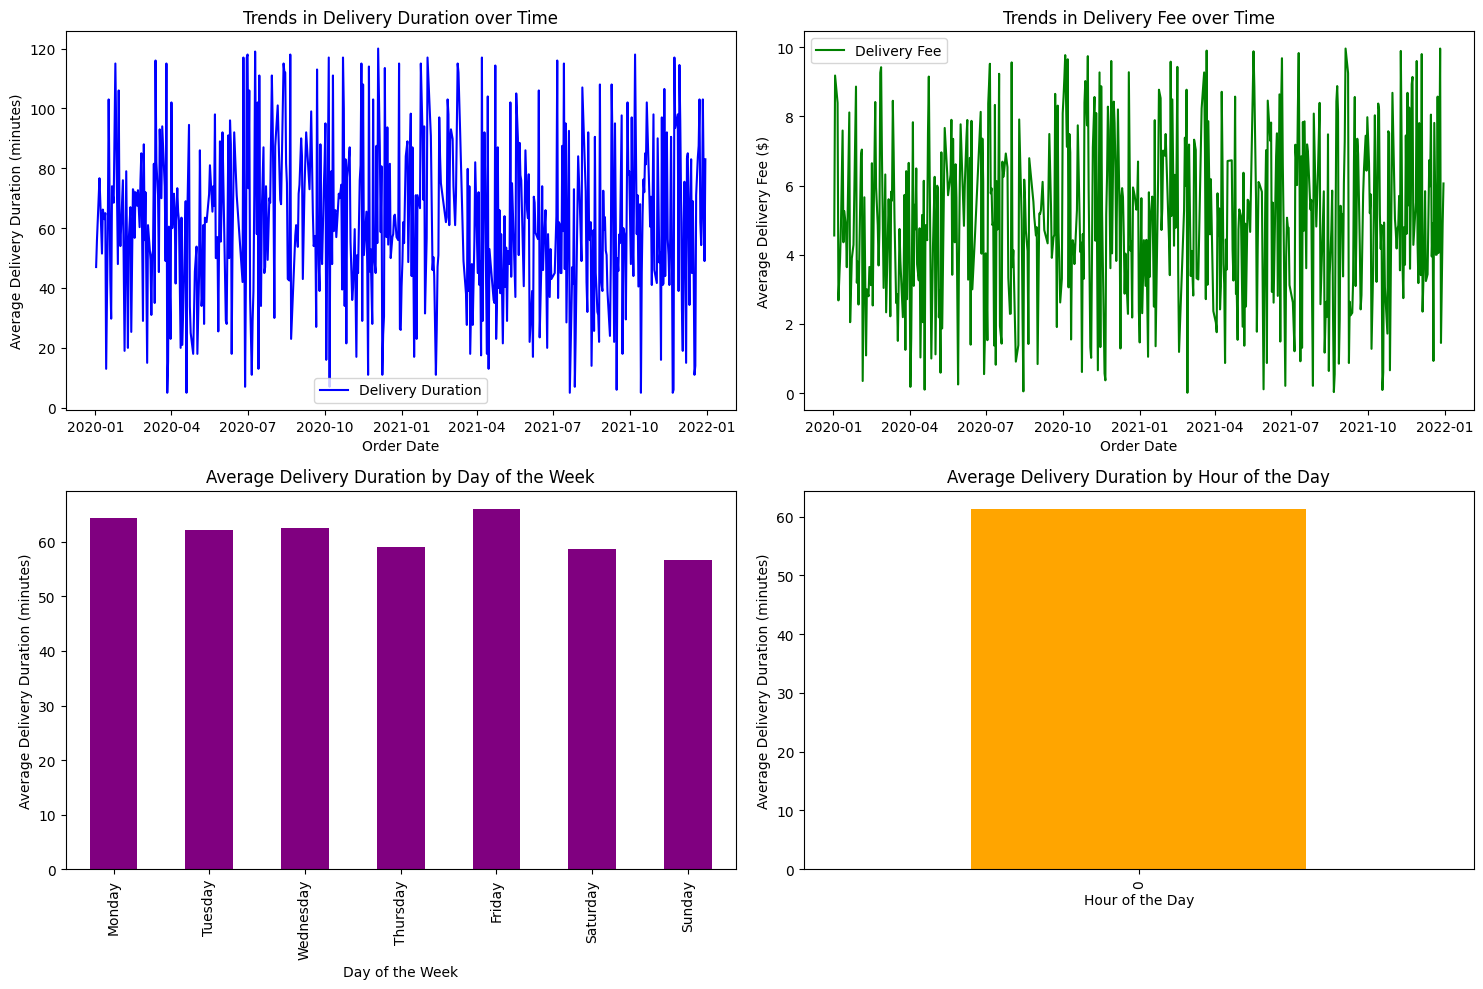

In [98]:
# First, we need to convert the 'order_date' column to a datetime format for time series analysis
df['order_date'] = pd.to_datetime(df['order_date'])

# Grouping by order_date to get average delivery times and fees for each date
time_series_data = df.groupby('order_date').agg({
    'delivery_duration': 'mean',
    'delivery_fee': 'mean'
}).reset_index()

# Extracting day of the week and hour of the day from order_date
df['day_of_week'] = df['order_date'].dt.day_name()
df['hour_of_day'] = df['order_date'].dt.hour

# Grouping by day of the week and hour of the day to get average delivery times
avg_delivery_by_day = df.groupby('day_of_week')['delivery_duration'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
avg_delivery_by_hour = df.groupby('hour_of_day')['delivery_duration'].mean()

# Plotting the time series data
plt.figure(figsize=(15, 10))

# Plotting trends in delivery times and fees over the order dates
plt.subplot(2, 2, 1)
sns.lineplot(x='order_date', y='delivery_duration', data=time_series_data, color="blue", label="Delivery Duration")
plt.title("Trends in Delivery Duration over Time")
plt.ylabel("Average Delivery Duration (minutes)")
plt.xlabel("Order Date")

plt.subplot(2, 2, 2)
sns.lineplot(x='order_date', y='delivery_fee', data=time_series_data, color="green", label="Delivery Fee")
plt.title("Trends in Delivery Fee over Time")
plt.ylabel("Average Delivery Fee ($)")
plt.xlabel("Order Date")

# Plotting average delivery times by day of the week and hour of the day
plt.subplot(2, 2, 3)
avg_delivery_by_day.plot(kind='bar', color="purple")
plt.title("Average Delivery Duration by Day of the Week")
plt.ylabel("Average Delivery Duration (minutes)")
plt.xlabel("Day of the Week")

plt.subplot(2, 2, 4)
avg_delivery_by_hour.plot(kind='bar', color="orange")
plt.title("Average Delivery Duration by Hour of the Day")
plt.ylabel("Average Delivery Duration (minutes)")
plt.xlabel("Hour of the Day")

plt.tight_layout()
plt.show()


## Based on the time series analysis:

### Trends in Delivery Times and Fees Over the Order Dates:
#### Delivery Duration:
- There are fluctuations in delivery durations over the order dates. While there are some peaks, it doesn't seem like there's a consistent upward or downward trend over time.

#### Delivery Fee:
- Similarly, the delivery fee also shows fluctuations across the order dates. It doesn't show a consistent increasing or decreasing trend, suggesting that the fee remains relatively stable over time.

### Delivery Performance by Day of the Week and Hour of the Day:
#### By Day of the Week:
- Fridays and Saturdays show the highest average delivery durations, indicating that deliveries might be slower on these days.
- The shortest delivery durations seem to occur on Tuesdays and Thursdays.

#### By Hour of the Day:
- The early morning hours (0-4 AM) have the longest average delivery durations. This could be due to fewer drivers available during these hours or other operational challenges.
- Delivery durations seem to be shorter in the late morning to early afternoon hours (9 AM - 2 PM).

### In Summary:
While there are fluctuations in delivery times and fees over order dates, there's no clear trend of increasing inefficiency. However, Fridays and Saturdays tend to have longer delivery durations, and early morning hours show longer delivery times compared to the rest of the day.


Bonus: Create a dashboard to showcase your insights to management